Asthma should really be related to air quality. If this doesn't work, nothing will.

Asthma data is averaged over the entire year of 2017, spatially divided by 2010 census tract.

In [6]:
import os

import pandas as pd
import geopandas as gpd

from air_brain.config import data_dir

In [4]:
asthma = pd.read_csv(data_dir / "asthma.csv")
# convert all numerators to fractions
for col in ["ED_visits", "ED_hosp", "UC_visits", "Asthma_use"]:
    asthma["{}_frac".format(col)] = asthma[col] / asthma.Total_members

In [5]:
asthma.loc[asthma.Total_members < 10]

,Census_tract,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,ED_visits_frac,ED_hosp_frac,UC_visits_frac,Asthma_use_frac
388,42003980000,0,0,0,0,1,0.0,0.0,0.0,0.000000
389,42003980100,0,0,0,1,4,0.0,0.0,0.0,0.250000
390,42003980300,0,0,0,0,4,0.0,0.0,0.0,0.000000
391,42003980400,0,0,0,1,6,0.0,0.0,0.0,0.166667
392,42003980500,0,0,0,2,4,0.0,0.0,0.0,0.500000
393,42003980600,0,0,0,0,5,0.0,0.0,0.0,0.000000
394,42003980700,0,0,0,1,2,0.0,0.0,0.0,0.500000
395,42003981000,0,0,0,0,8,0.0,0.0,0.0,0.000000


In [7]:
# all 2010 census tracts as polygons
tracts = gpd.read_file(data_dir / "tract_2010" / "tl_2010_42003_tract10.shp")
# need to rename tracts to match the asthma file
tracts.rename(columns={"TRACTCE10": "Census_tract"}, inplace=True)
tracts.Census_tract = "42003" + tracts.Census_tract.astype(str)
tracts.Census_tract = tracts.Census_tract.astype(int)
tracts[["Census_tract", "geometry"]]

,Census_tract,geometry
0,42003560500,"POLYGON ((-79.88975 40.43554, -79.88997 40.435..."
1,42003560400,"POLYGON ((-79.88648 40.44009, -79.88648 40.440..."
2,42003552400,"POLYGON ((-79.84286 40.32385, -79.84357 40.325..."
3,42003552300,"POLYGON ((-79.84599 40.34514, -79.84599 40.345..."
4,42003552200,"POLYGON ((-79.87063 40.35539, -79.87038 40.355..."
...,...,...
397,42003562600,"POLYGON ((-80.03294 40.43794, -80.03296 40.437..."
398,42003980000,"POLYGON ((-79.8888 40.48401, -79.88888 40.4840..."
399,42003561900,"POLYGON ((-79.89169 40.47478, -79.89064 40.474..."
400,42003563200,"POLYGON ((-80.00212 40.45813, -80.00215 40.458..."


In [12]:
df = tracts.merge(asthma, on="Census_tract", how="outer", validate="1:1")
df.Total_members = df.Total_members.fillna(0)
len(df)

402

In [11]:
df.loc[df.Total_members < 10]

,STATEFP10,COUNTYFP10,Census_tract,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,geometry,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,ED_visits_frac,ED_hosp_frac,UC_visits_frac,Asthma_use_frac
388,42,003,42003980000,42003980000,9800,Census Tract 9800,G5020,S,637235,237268,...,"POLYGON ((-79.8888 40.48401, -79.88888 40.4840...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
389,42,003,42003980100,42003980100,9801,Census Tract 9801,G5020,S,1440881,252755,...,"POLYGON ((-79.9146 40.46741, -79.91513 40.4679...",0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.250000
390,42,003,42003980300,42003980300,9803,Census Tract 9803,G5020,S,1294099,0,...,"POLYGON ((-79.90621 40.42779, -79.9063 40.4278...",0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.000000
391,42,003,42003980400,42003980400,9804,Census Tract 9804,G5020,S,1106408,0,...,"POLYGON ((-80.02512 40.48525, -80.02479 40.485...",0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.166667
392,42,003,42003980500,42003980500,9805,Census Tract 9805,G5020,S,1603807,8799,...,"POLYGON ((-79.93317 40.42923, -79.93356 40.429...",0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.500000
393,42,003,42003980600,42003980600,9806,Census Tract 9806,G5020,S,982752,473795,...,"POLYGON ((-80.03331 40.46179, -80.03312 40.461...",0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.000000
394,42,003,42003980700,42003980700,9807,Census Tract 9807,G5020,S,563109,416134,...,"POLYGON ((-80.01773 40.43974, -80.0179 40.4398...",0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.500000
395,42,003,42003980800,42003980800,9808,Census Tract 9808,G5020,S,400091,163596,...,"POLYGON ((-79.96266 40.4334, -79.96213 40.4331...",NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
396,42,003,42003980900,42003980900,9809,Census Tract 9809,G5020,S,1453388,854869,...,"POLYGON ((-80.03312 40.46182, -80.03331 40.461...",NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
397,42,003,42003981000,42003981000,9810,Census Tract 9810,G5020,S,1377043,0,...,"POLYGON ((-79.95805 40.47386, -79.95798 40.473...",0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.000000


<Axes: >

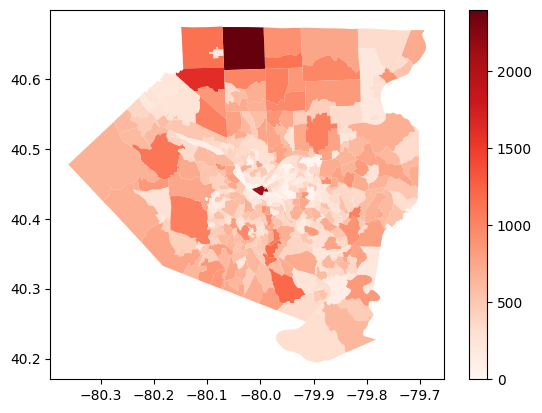

In [13]:
df.plot(column="Total_members", legend=True, cmap="Reds")